In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
with open('data/shell_comparison_RAL.json') as f:
    data = json.load(f)
    df_runs = pd.json_normalize(data)
    df_runs.columns = [col.split('.')[-1] for col in df_runs.columns]
    
    df_runs = df_runs[df_runs['planner'] != 'cuttingplane']
    df_runs = df_runs[df_runs['planner'] != 'cylinder']

    df_runs['planner'] = df_runs['planner'].str\
        .replace('cgal', 'Convex Hull Geodesics')\
        .replace('cuttingplane', 'Cutting Plane Heuristic')\
        .replace('cylinder', 'Minimum Enclosing Cylinder')\
        .replace('sphere', 'Minimum Enclosing Sphere')

In [3]:
agged = df_runs.groupby(['scene','planner']).agg(['mean','sem'])[['total_experiment_runtime','total_path_length','n_visited']]

In [4]:
agged

total_experiment_runtime               \
                                                            mean          sem   
scene          planner                                                          
appletree      Convex Hull Geodesics                     51571.8   761.950054   
               Minimum Enclosing Sphere                  51443.9   678.952534   
appletree1     Convex Hull Geodesics                      1740.8    31.094766   
               Minimum Enclosing Sphere                   1927.4    54.533822   
appletree2     Convex Hull Geodesics                      5690.7   159.100391   
               Minimum Enclosing Sphere                   5738.6    64.258886   
appletree3     Convex Hull Geodesics                     67902.6  1735.223945   
               Minimum Enclosing Sphere                  52728.8  1098.860003   
lemontree1     Convex Hull Geodesics                      9896.5   200.344606   
               Minimum Enclosing Sphere                   9971.0   279.350755   
lemontree2     Convex Hull Geodesics                     27678.3   354.082227   
               Minimum Enclosing Sphere                  27713.0   374.883982   
nectarinetree1 Convex Hull Geodesics                     14553.3   272.881173   
               Minimum Enclosing Sphere                  14405.5   213.799244   
nectarinetree2 Convex Hull Geodesics                     13780.9   333.636444   
               Minimum Enclosing Sphere                  14294.5   236.690292   
orangetree1    Convex Hull Geodesics                      3167.8   101.822373   
               Minimum Enclosing Sphere                   3116.8    51.177860   
orangetree2    Convex Hull Geodesics                      3674.5   119.791138   
               Minimum Enclosing Sphere                   5562.4   134.243825   
orangetree3    Convex Hull Geodesics                     26893.8   509.815235   
               Minimum Enclosing Sphere                  30491.4   558.969274   
orangetree4    Convex Hull Geodesics                    145412.7  1735.337931   
               Minimum Enclosing Sphere                 145846.9   932.144510   
peartree1      Convex Hull Geodesics                      7174.7   123.201646   
               Minimum Enclosing Sphere                   6215.3   148.144003   
peartree2      Convex Hull Geodesics                     14243.4   226.909194   
               Minimum Enclosing Sphere                  16774.8   361.357742   
peartree3      Convex Hull Geodesics                    148420.8   645.161940   
               Minimum Enclosing Sphere                 131223.1  1896.037842   

                                        total_path_length             \
                                                     mean        sem   
scene          planner                                                 
appletree      Convex Hull Geodesics           514.513588   6.127298   
               Minimum Enclosing Sphere        527.065161   7.155962   
appletree1     Convex Hull Geodesics            44.190656   3.183493   
               Minimum Enclosing Sphere         54.150653   2.662889   
appletree2     Convex Hull Geodesics           144.276408   2.022239   
               Minimum Enclosing Sphere        198.001377   4.316178   
appletree3     Convex Hull Geodesics          1800.598564  16.250150   
               Minimum Enclosing Sphere       1815.910131  14.634095   
lemontree1     Convex Hull Geodesics           167.716925   1.971647   
               Minimum Enclosing Sphere        175.804545   3.019838   
lemontree2     Convex Hull Geodesics           682.449075   9.487519   
               Minimum Enclosing Sphere        710.256884   9.977496   
nectarinetree1 Convex Hull Geodesics           242.037177   4.422989   
               Minimum Enclosing Sphere        271.605976   5.253229   
nectarinetree2 Convex Hull Geodesics           280.396434   4.676323   
               Minimum Enclosing Sphere        327.659524   4.497071  

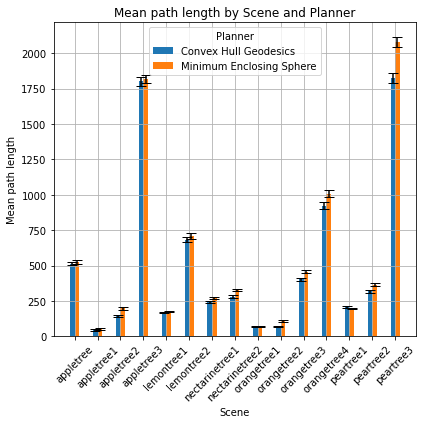

In [5]:
plt.figure(figsize=(6,6))

scene_order = agged.index.get_level_values('scene').unique()
planner_order = agged.index.get_level_values('planner').unique()

bar_width = 0.2
bar_positions = {}
for i, planner in enumerate(planner_order):
    bar_positions[planner] = [j + i * bar_width for j in range(len(scene_order))]


for planner in planner_order:
    plt.bar(bar_positions[planner], agged.loc[pd.IndexSlice[:, planner], ('total_path_length', 'mean')], 
           width=bar_width, label=planner,
           yerr=agged.loc[pd.IndexSlice[:, planner], ('total_path_length', 'sem')] * 1.96,
           capsize=5)

plt.xticks([pos + bar_width * (len(planner_order) - 1) / 2 for pos in bar_positions[planner_order[0]]], scene_order, orientation = 45)
plt.xlabel('Scene')
plt.ylabel(f'Mean path length')
plt.title(f'Mean path length by Scene and Planner')
plt.grid()
plt.legend(title='Planner')

plt.tight_layout()
plt.savefig('comparison_trees_vertical.pdf')
plt.show()

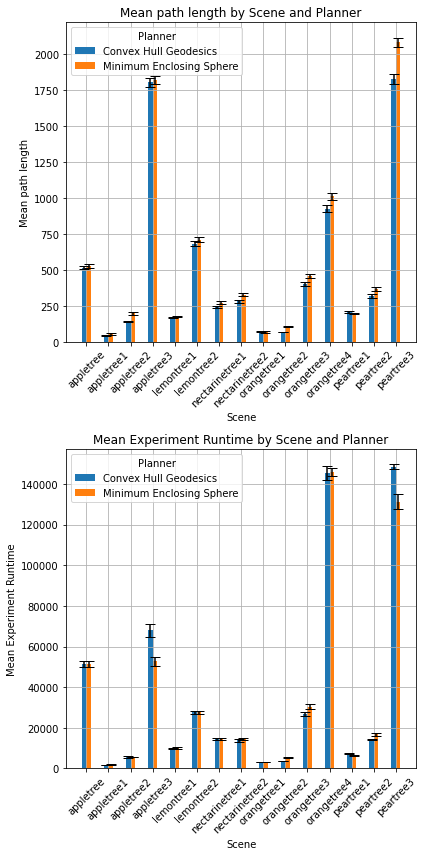

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(6,12))  # Create a figure with two plots vertically arranged

scene_order = agged.index.get_level_values('scene').unique()
planner_order = agged.index.get_level_values('planner').unique()

bar_width = 0.2
bar_positions = {}
for i, planner in enumerate(planner_order):
    bar_positions[planner] = [j + i * bar_width for j in range(len(scene_order))]


# Plot 1: total_path_length
for planner in planner_order:
    axs[0].bar(bar_positions[planner], agged.loc[pd.IndexSlice[:, planner], ('total_path_length', 'mean')], 
           width=bar_width, label=planner,
           yerr=agged.loc[pd.IndexSlice[:, planner], ('total_path_length', 'sem')] * 1.96,
           capsize=5)

axs[0].set_xticks([pos + bar_width * (len(planner_order) - 1) / 2 for pos in bar_positions[planner_order[0]]])
axs[0].set_xticklabels(scene_order, orientation = 45)
axs[0].set_xlabel('Scene')
axs[0].set_ylabel(f'Mean path length')
axs[0].set_title(f'Mean path length by Scene and Planner')
axs[0].grid()
axs[0].legend(title='Planner')

# Plot 2: total_experiment_runtime, assuming this is another metric in your DataFrame
for planner in planner_order:
    axs[1].bar(bar_positions[planner], agged.loc[pd.IndexSlice[:, planner], ('total_experiment_runtime', 'mean')], 
           width=bar_width, label=planner,
           yerr=agged.loc[pd.IndexSlice[:, planner], ('total_experiment_runtime', 'sem')] * 1.96,
           capsize=5)

axs[1].set_xticks([pos + bar_width * (len(planner_order) - 1) / 2 for pos in bar_positions[planner_order[0]]])
axs[1].set_xticklabels(scene_order, orientation = 45)
axs[1].set_xlabel('Scene')
axs[1].set_ylabel(f'Mean Experiment Runtime')
axs[1].set_title(f'Mean Experiment Runtime by Scene and Planner')
axs[1].grid()
axs[1].legend(title='Planner')

plt.tight_layout()
plt.savefig('comparison_trees_vertical.pdf')
plt.show()


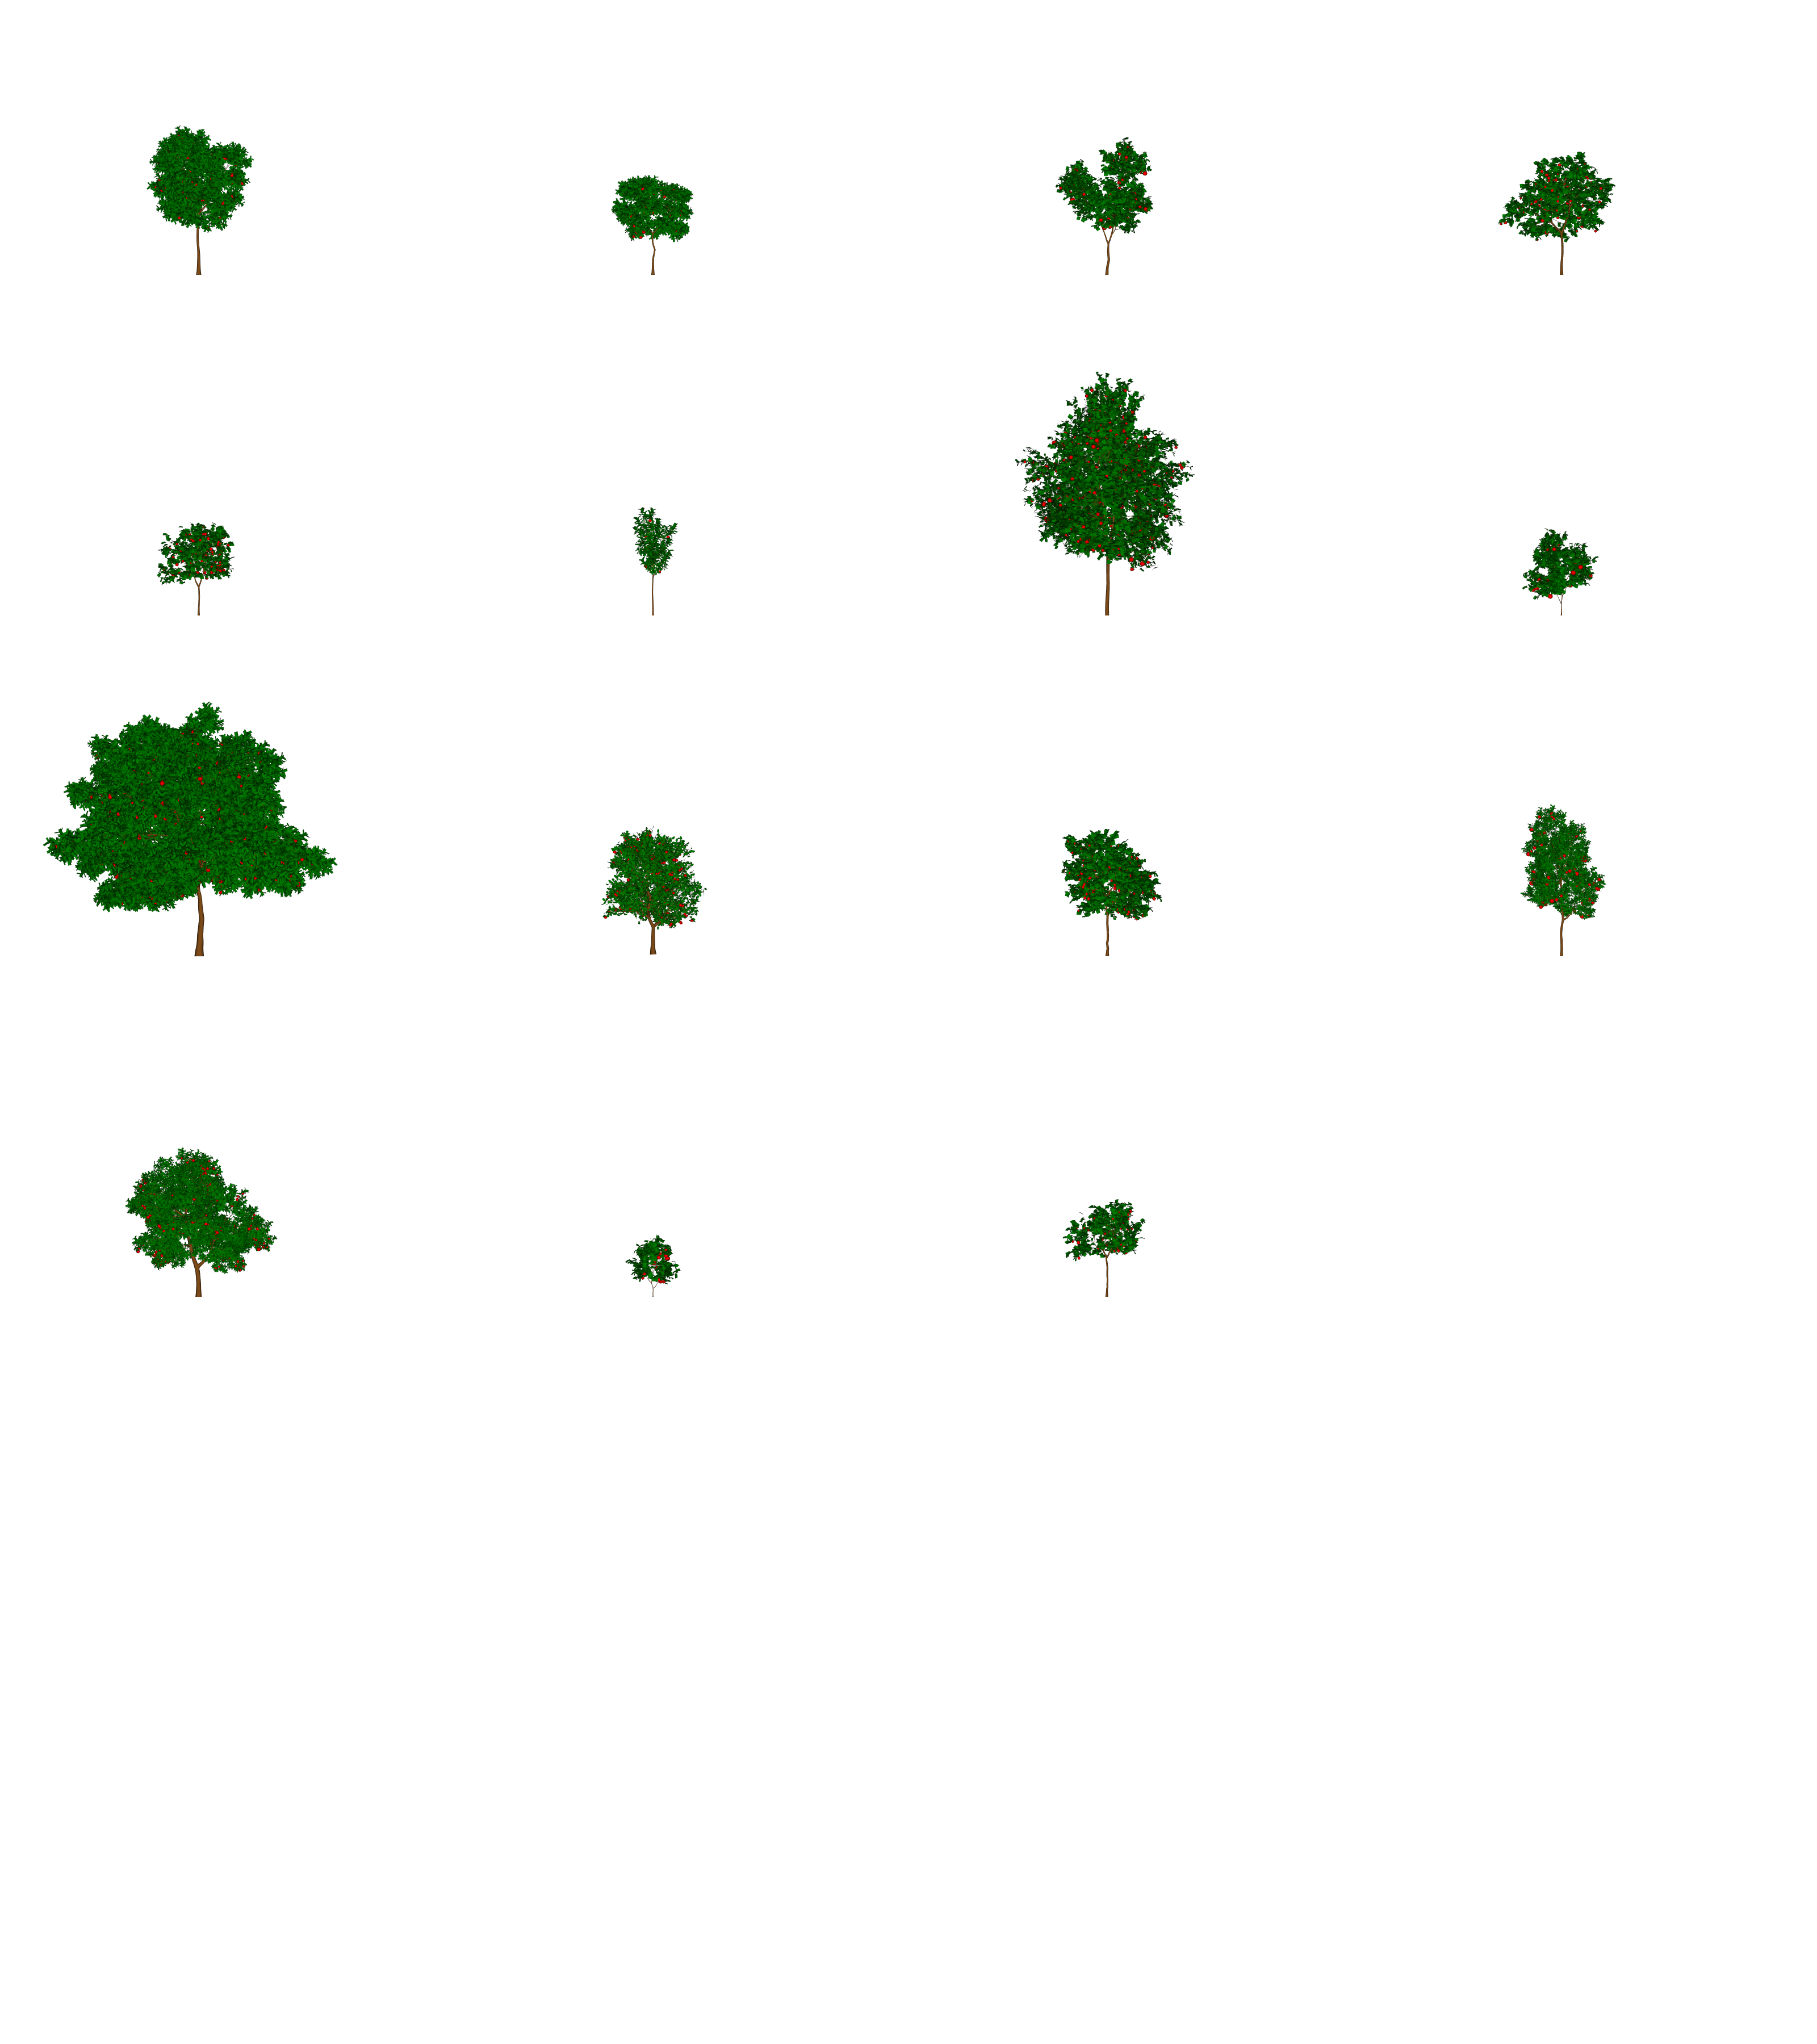

In [6]:
from PIL import Image
import os

# Directory containing images
dir_path = "/home/werner/ws_moveit2/src/motion-planning-around-apple-trees/tree_pics"

image_files = [os.path.join(dir_path,name+'.png') for name in df_runs['scene'].unique()]

# Grid dimensions
ROWS = 6
COLS = 4

VCROP_AMOUNT = 0
HCROP_AMOUNT = 50

image_sample = Image.open(image_files[0])
width, height = image_sample.size
width -= 2 * HCROP_AMOUNT
height -= 2 * VCROP_AMOUNT

# Assuming all images are the same size, get dimensions of first image
width, height = Image.open(image_files[0]).size

# Create a new image of size ROWSxCOLS (width x height)
grid_img = Image.new('RGBA', (width * COLS, height * ROWS))

x = 0
y = 0

# Calculate the total number of images
total_images = len(image_files)

for index, image_file in enumerate(image_files):
    
    img = Image.open(os.path.join(dir_path, image_file))
    
    img = img.crop((HCROP_AMOUNT, HCROP_AMOUNT, img.width - HCROP_AMOUNT, img.height - VCROP_AMOUNT))

    # For the last row, if there are less than COLS images, adjust x to center the images
    if y == height * (ROWS - 1) and total_images % COLS != 0:
        x = width * ((COLS - total_images % COLS) // 2)  # the remaining space divided by 2

    # Paste the image at location x, y
    grid_img.paste(img, (x, y))

    # Update the position for the next image
    x += width
    if x >= grid_img.width or (y == height * (ROWS - 1) and (index + 1) % COLS == 0):
        x = 0
        y += height

# Save the grid image
grid_img.save("grid_image.png", "PNG")

grid_img